# Multivariate linear regression

In this notebook, we implement an algorithm of linear regression with $n$ number of features.<br>
For the cost function, we use the mean squared error function, which is defined as
$$C(\mathbf{x}) = \frac{1}{2m}\sum_{i}^{m} \left(\mathbf{a}\cdot\mathbf{x}^{(i)}-y^{(i)}\right)^2,$$
where $\mathbf{x}^{(i)}\in\{x_0^{(i)},x_1^{(i)},\cdots,x_n^{(i)}\}$ and $y^{(i)}$ are the training data, $m$ the number of training data, and $\mathbf{a}\in\{a_0,a_1,\cdots,a_n\}$ the fitting parameters.

The fitting parameters are optimized using gradient descent,
$$
\mathbf{a}^{\mathrm{new}} = \mathbf{a} - \eta \nabla_{\mathbf{a}} C(\mathbf{x}).
$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
class MultivariateLinearRegression():
    """
    It fits n-dimentional data with a linear fit function.
    It minimizes the cost function using gradient descent
    in order to find the fit parameters.
    x    : n-dimensional input training data, x.shape = (n, m)
    y    : 1d output training data, y.shape = m
    eta  : learning rate
    N    : total # of iterations
    """
    def __init__(self,x,y):
        """
        Initializing the setup.
        x : (n+1)-dimensional input training data, x.shape = (n+1, m)
            x[0] corresponds to the 0th order term
        y : 1d output training data, y.shape = m
        a : (n+1)-dimensional fitting parameters
        costs: cost as a function of iteration
        """
        self.N, self.M   = x.shape
        self.a      = np.random.randn(self.N)
        self.costs  = []

    
    def fit_func(self,x):
        """
        Linear fit function
        """
        return (self.a).dot(x)

    def cost(self,x,y):
        """
        The mean squared error function
        """
        return 0.5*np.average((self.fit_func(x) - y)**2)

    def del_cost(self,x,y):
        """
        Derivative of the cost function with respect to a0
        """
        return self.fit_func(x)-y

    def update(self,x,y,eta):
        """
        Updating the fitting paramters using gradient descent.
        """
        temp = self.a - eta*np.average([self.del_cost(x,y)*I for I in x],axis=1)
        self.a = temp
    
    def run(self,x,y,eta,N):
        """
        Iterating the update function as well as calculating the cost.
        """
        for i in range(N):
            self.update(x,y,eta)
            self.costs.append(self.cost(x,y))   

In [7]:
# Preparing training dataset (2d array)
X    = np.random.randn(2,1000)
X    = np.vstack([np.ones(X.shape[1]), X]) # adding the 0th order term
Y = 3*X[1]+2*X[2]+np.random.randn(1000)

In [8]:
LR = MultivariateLinearRegression(X,Y)
LR.run(X,Y,0.1,3000)

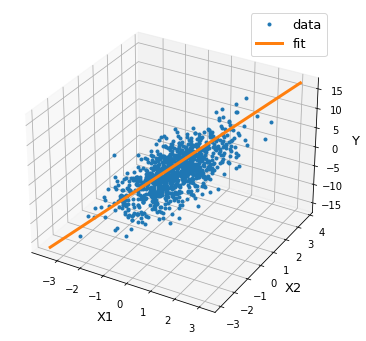

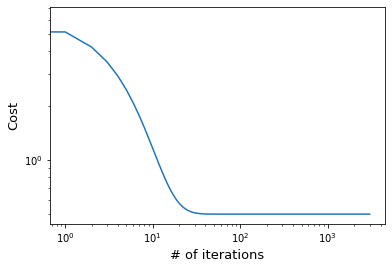

In [9]:
fit_x0 = np.linspace(X[0].min(),X[0].max(),100)
fit_x1 = np.linspace(X[1].min(),X[1].max(),100)
fit_x2 = np.linspace(X[2].min(),X[2].max(),100)
fig = plt.figure(figsize = (10,6))
ax0 = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(wspace=0.3)
ax0.plot(X[1],X[2],Y,'.', label = 'data')
ax0.plot(fit_x1,fit_x2, LR.fit_func((fit_x0,fit_x1,fit_x2)),linewidth=3, label = 'fit')
ax0.legend(fontsize=13)
ax0.set_xlabel('X1',fontsize = 13)
ax0.set_ylabel('X2',fontsize = 13)
ax0.set_zlabel('Y',fontsize = 13)
ax1 = plt.figure().gca()
ax1.plot(LR.costs)
ax1.set_xlabel('# of iterations',fontsize = 13)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Cost',fontsize = 13)
plt.show()